# **Training Models** #

## Linear Regression ##

**Linear model basically predicts something by computing a weighted sum of the input features along with a bias value for your model**

Training a Linear model is very easy. You just need to see how good or poorly the model fits to data. You can do this by checking the mean squared error. Minimising this means minimising the root mean squared error which evaluated the performance of the model eventually.

### The Normal Equation ###

Normal equation determines the best values of the parameters of the model that best fits the data and gives best prediction 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

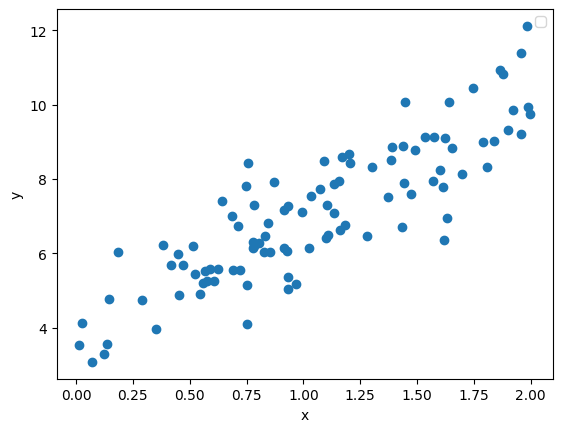

In [46]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show

In [47]:
x_b=np.c_[np.ones((100,1)),x]

In [48]:
theta=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [49]:
theta

array([[3.85372019],
       [3.08555725]])

*We can see that the parameters are 4 and 3 . We used the equation y=4 + 3.x + Gaussian nosie. It is close to it.*

**Now we will use this for prediction**

In [50]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta)
y_predict

array([[ 3.85372019],
       [10.0248347 ]])

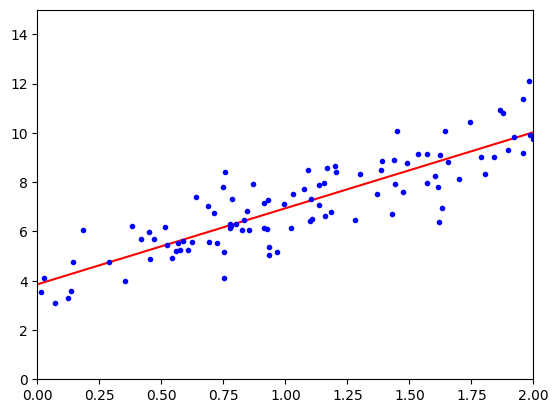

In [51]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

**Doing prediction using scikit learn library of linear regression is very easy**

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_
cc=np.c_[lin_reg.intercept_,lin_reg.coef_]
cc

array([[3.85372019, 3.08555725]])

In [53]:
prediction=lin_reg.predict(x_new)
prediction

array([[ 3.85372019],
       [10.0248347 ]])

**Whats happening under the hood is**

In [54]:
theta_best,residual,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best

array([[3.85372019],
       [3.08555725]])

*The lstsq (least squares) function compute the theta= X(transpose) . y  .You can use np.linalg.pinv() directly to compute pseudoinverse directly*

In [55]:
np.linalg.pinv(x_b).dot(y)

array([[3.85372019],
       [3.08555725]])

**We will now look at various methods to best train our linear regression model**

## **Gradient Descent** ##

*It Reduces the cost function ( Error between prediction and target values ) for instance by going down the hill in the steepest direction*

*You start with a random initial value in the theta axis and take baby steps in order to reduce the cost function to the minimum i.e. MSE or RMSE*

*The step size of gradient descent is characterized by learning rate hyperparameter i.e. low learning rate implicates too many steps to converge*

**Let's implement this using python**

In [56]:
learning_rate=0.1
n_iterations=1000
instances=100

theta_gd=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=(2/instances)*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-learning_rate*gradients

In [57]:
theta

array([[3.85372019],
       [3.08555725]])

## **Stochastic Gradient Descent** ##

*Stochastic ( random ) means that rather than using whole batch or dataset at each iteration of calculating the MSE gradient it uses only a instance out of the batch which changes at every instance . It's benifit is that it has a flagrant speed but it's con is that the cost function is very irregular and has jumps which could also be beneficial in a sense that it helps escape the local minima*

**To overcome this you should use learning schedule which means that is starts with high learning rate which helps escape local minima and gradually decreasing step size so that it can converge**

In [58]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta_sgd=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(instances):
        random_index=np.random.randint(instances)
        x_i=x_b[random_index:random_index+1]
        y_i=y[random_index:random_index+1]
        gradients_sgd=2*x_i.T.dot(x_i.dot(theta_sgd)-y_i)
        eta=learning_schedule(epoch*instances+i)
        theta_sgd=theta_sgd-eta*gradients_sgd

In [59]:

theta_sgd

array([[3.86482479],
       [3.09734865]])

## **Polynomial regression** ##

**Now suppose your data is such that a linear line doesn't fit in it . You can use polynomial regression which is more than a straight line i.e. it adds power of each feature as new feature**

In [60]:
m=100
px=6*np.random.rand(m,1)-3
py=0.5* px **2 +px+2+np.random.randn(m,1)

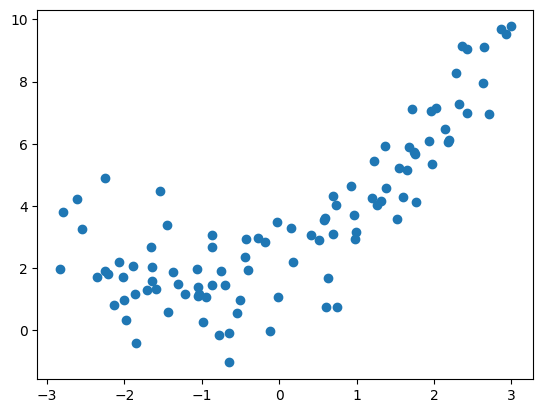

In [61]:
plt.scatter(px,py)

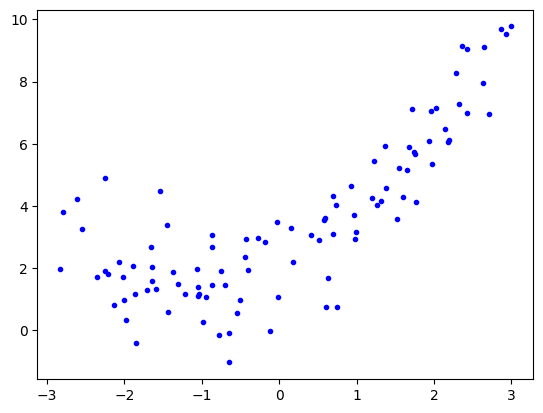

In [62]:
plt.plot(px,py,"b.")

**lets use scikit learn polynomial features library to add a new feature i.e. the square of each feature in training set as new feature**

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
px_poly=poly_features.fit_transform(px)

In [64]:
px[0],px_poly[0]

(array([2.42880489]), array([2.42880489, 5.8990932 ]))

- Now we can fit the linear regression model to this extended training data.

In [65]:
lin_reg.fit(px_poly,py)
lin_reg.intercept_,lin_reg.coef_


(array([2.01601261]), array([[1.09639797, 0.52191241]]))

In [66]:
p_prediction=lin_reg.predict(px_poly)

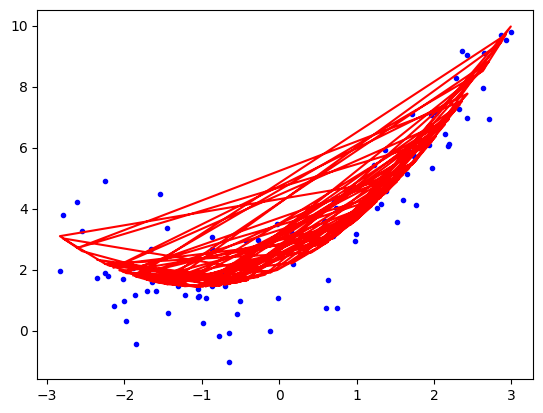

In [67]:
plt.plot(px,py,"b.")
plt.plot(px,p_prediction,'r-')

- **You can see the performance of your model using the cross validation like we did before to see if it underfits or overfits the data . Secondly Learning curves can also be used to do so**

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_val_predict=model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+" ,linewidth=2 ,label='train')
    plt.plot(np.sqrt(val_errors),"b-" ,linewidth=3 ,label='val')
                            

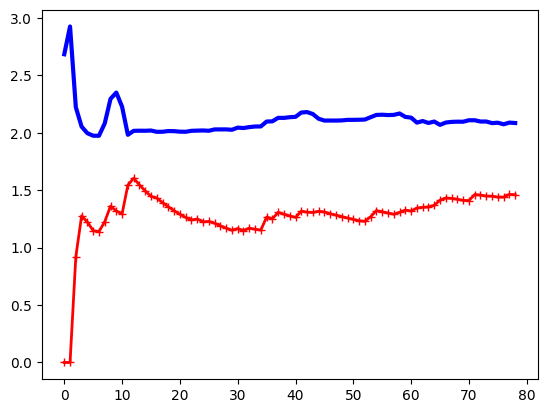

In [69]:
plot_learning_curves(lin_reg,px,py)

In [70]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression()),
])

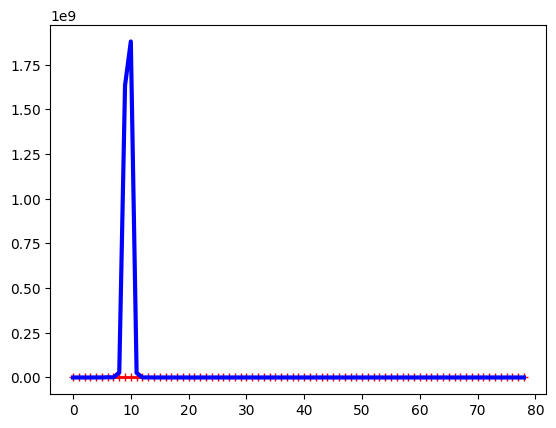

In [71]:
plot_learning_curves(polynomial_regression,px,py)

**In regression we can constraint the model from overfitting the data by regularizing it so it will have less degree of freedom**

**We can do this by reducing the polynomial degree to reduce the variance**

- *For a linear model regularization is typically achieved by reducing the weights of the model* 

## **Ridge Regression** ##

- This adds a regularization term in the cost function which forces the learning algorithm not to overfit the data . Note that this regularization term should only be added during the training part , once model is trained use the unregularized performance measures to see the performance of model.

- Hyperparameter alpha controls how much you want to regularize the model . If alpha = 0 it's just linear regression and if alpha is very large then all weights end up very close to 0 and result is flat line going through the mean 

**Performing Ridge regression using scikit learn**

In [72]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(px,py)
ridge_reg.predict([[1.5]])

array([[5.21229716]])

In [73]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(px,py.ravel())
sgd_reg.predict([[1.5]])

array([5.17946686])

**Ridge regression involves l2 regularization which means that is adds penalty by shrinking the co-efficients**

## **Lasso Regression** ##

**Lasso regression involves l1 regularization which eventually means it picks a subset of features by making some co-efficients zero (It tends to remove weights of least important features)**

In [74]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(px,py)
lasso_reg.predict([[1.5]])


array([5.16548818])

## **Elastic Regression** ##

**Elastic regression is the midway between ridge regression and lasso regression . It doesn't omits the least important features complete like in lasso l1 and is between the both**

In [75]:

from sklearn.linear_model import ElasticNet
elastic_regg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_regg.fit(px,py)
elastic_regg.predict([[1.5]])

array([5.16079533])

## **Early Stopping** ##

- A very important method is known as early stopping . You train the model in batch gradient descent or SGD and as the epochs advances it looks the RMSE , when it reaches the lowest point (Which doesn't necessirily means that with increasing epochs it will go down) , it stops the gradient descent .

In [76]:
x_trains,x_vals,y_trains,y_vals=train_test_split(px,py,test_size=0.2)

In [77]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler=Pipeline([
    ('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
    ('std_scaler' , StandardScaler()),
])
x_train_poly_scaled=poly_scaler.fit_transform(x_trains)
x_val_poly_scaled=poly_scaler.transform(x_vals)

sgd_regg=SGDRegressor(max_iter=1,tol=None,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

min_val_error=float('inf')
best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_regg.fit(x_train_poly_scaled,y_trains)
    y_val_predict=sgd_regg.predict(x_val_poly_scaled)
    val_error=mean_squared_error(y_vals,y_val_predict)
    if val_error < min_val_error:
        min_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_regg)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\L

## **Logistic regression** ##

- By name it looks like a regression but it is basically a classification algorithm . It also works on the basis or weighted input fetures but rather than computing the direct output using them , It gives a probability between 0 and 1 that it belongs to first class or second (Basically a binary classification algorithm) 

- It uses a sigmoid activation function giving output between 0 and 1

In [81]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())
lx=iris['data'][:,3:]
ly=(iris['target'] == 2).astype(int)

In [82]:
from sklearn.linear_model import LogisticRegression
log_regg=LogisticRegression()
log_regg.fit(lx,ly)

LogisticRegression()

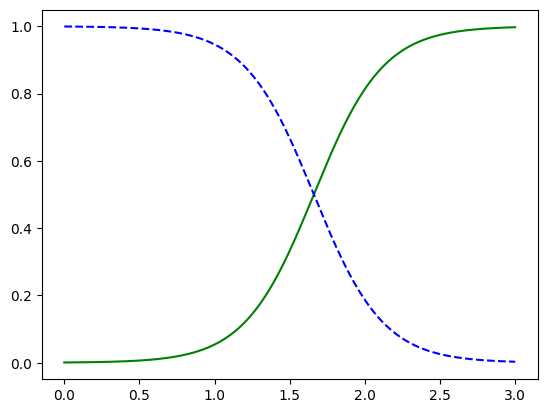

In [95]:
lx_new=np.linspace(0,3,1000).reshape(-1,1)
ly_new=log_regg.predict_proba(lx_new)
plt.plot(lx_new,ly_new[:,1],"g-" ,label="iris_virginica")
plt.plot(lx_new,ly_new[:,0],'b--', label='not iris virginica')

- This can also be regularized by a l1 and l2 penalty (default) but here the hyperparameter is not alpha rathe c which is inverse of alpha depicting high value as low regularization.

## **Softmax Regression** ##

- If there are more than 1 classes and we have to predict what class the instance belongs to, we use the softmax regression .

- It first calculates the scores of each class using the softmax function provided the instance x.

- It then computes the probability that particular instance belongs to which class by running scores through softmax function (takes exponential of each score and then normalise it)

In [96]:
sx=iris['data'][:,(2,3)]
sy=iris['target']
softmax_regg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_regg.fit(sx,sy)

LogisticRegression(C=10, multi_class='multinomial')